DataLaksa project exercise: buy more, sell more, 
- find out what we product manager should sell more or less in the website Home Entertainment section using discount status, discount difference, discounted price
- Products : TV,DVD, Audio, Accessories and Gaming Console
- scrape whatever data you think is relevant to help answer the business problem 
- which products/brands we sell more or less. 
- Use ONLY python to scrape this you can use beautiful soup + selenium etc
- you need to visualize this in and recomendd as well on the data- require analysis
- use a jupyter notebook with tableau, powerbi, lookwer studio, charts

In [1]:
from selenium import webdriver
from selenium.webdriver import Chrome, ChromeOptions
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support import expected_conditions
from selenium.webdriver.support.ui import WebDriverWait
from bs4 import BeautifulSoup
from bs4 import MarkupResemblesLocatorWarning
from pandas.core.common import SettingWithCopyWarning
import requests as req
import pandas as pd
import urllib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

import time
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=SettingWithCopyWarning)

## Data Collection
Home Entertainment - TV

In [5]:
browser_options = ChromeOptions()
# browser_options.headless = True

chrome_url = 'https://www.senheng.com.my/all-products/home-entertainment.html'
driver = webdriver.Chrome(options=browser_options)
driver.get(chrome_url)
driver.maximize_window()

homen_tv = driver.find_element(By.XPATH, '//*[@id="scrollable-prevent-tab-1"]/span[1]')
homen_tv.click()

start = time.time()

# get scroll height 
last_height = driver.execute_script('return document.body.scrollHeight')

while True:
    # scroll down 1000 pixel
    driver.execute_script('window.scrollBy(0, document.body.scrollHeight)')
    
    # wait for load
    time.sleep(2)

    end = time.time()

    # calculate new scroll height and compare with last scroll height
    new_height = driver.execute_script('return document.body.scrollHeight')
    # scroll selama 20 detik (end - start)
    # if driver.execute_script('return window.innerHeight + window.pageYoffset.height => document.body.offsetHeight'):
    # if round(end - start) > 20: 
    if new_height == last_height:
        break

    last_height = new_height

tv_soup = BeautifulSoup(driver.page_source, 'html.parser')

senheng_tv = tv_soup.find_all('div',{'class':'jss121'})

product_names = []
real_prices = []
current_prices = []

# senheng_tv[0].find('p',{'class':'jss123'}).get_text()
# senheng_tv[0].find('div',{'class':'desc-item__price'}).find('span',{'class':'jss141'}).find('strike').get_text()
# senheng_tv[0].find('div',{'class':'desc-item__price'}).find_next('span',
#                                 {'class':'jss141'}).find_next('span',{'class':'jss141'}).get_text()

for sentv in senheng_tv:
    try:
        product_names.append(sentv.find('p',{'class':'jss122'}).get_text())
    except:
        product_names.append('N/A')
    try:
        real_prices.append(sentv.find('div',{'class':'desc-item__price'}).find('span',{'class':'jss140'}).find('strike').get_text())
    except:
        real_prices.append('N/A')
    try:
        current_prices.append(sentv.find('div',{'class':'desc-item__price'}).find_next('span',
                            {'class':'jss140'}).find_next('span',{'class':'jss140'}).get_text())
    except:
        current_prices.append('N/A')

tv_dict = {'Product Names' : product_names, 'Real Prices':real_prices, 'Discount Prices':current_prices}

driver.close()

Home Entertainment - Audio

In [109]:
browser_options = ChromeOptions()
# browser_options.headless = True

chrome_url = 'https://www.senheng.com.my/all-products/home-entertainment.html'
driver = webdriver.Chrome(options=browser_options)
driver.get(chrome_url)
driver.maximize_window()

homen_audio = driver.find_element(By.XPATH, '//*[@id="scrollable-prevent-tab-2"]/span[1]')
homen_audio.click()

start = time.time()

# get scroll height 
last_height = driver.execute_script('return document.body.scrollHeight')

while True:
    # scroll down 1000 pixel
    driver.execute_script('window.scrollBy(0, document.body.scrollHeight)')
    
    # wait for load
    time.sleep(2)

    end = time.time()

    # calculate new scroll height and compare with last scroll height
    new_height = driver.execute_script('return document.body.scrollHeight')
    # scroll selama 20 detik (end - start)
    # if driver.execute_script('return window.innerHeight + window.pageYoffset.height => document.body.offsetHeight'):
    # if round(end - start) > 20: 
    if new_height == last_height:
        break

    last_height = new_height

audio_soup = BeautifulSoup(driver.page_source, 'html.parser')

senheng_audio = audio_soup.find_all('div',{'class':'jss121'})

product_names = []
real_prices = []
current_prices = []

for senaudio in senheng_audio:
    try:
        product_names.append(senaudio.find('p',{'class':'jss122'}).get_text())
    except:
        product_names.append('N/A')
    if senaudio.find('div', {'class': 'desc-item__price'}).find('span', {'class': 'jss140'}) is not None:
        # Elemen span ada
        if senaudio.find('div', {'class': 'desc-item__price'}).find('span', {'class': 'jss140'}).find('strike') is not None:
            # Elemen strike ada
            real_prices.append(senaudio.find('div', {'class': 'desc-item__price'}).find('span', {'class': 'jss140'}).find('strike').get_text())
            current_prices.append(senaudio.find('div', {'class': 'desc-item__price'}).find_next('span', 
                                                        {'class': 'jss140'}).find_next('span', {'class': 'jss140'}).get_text())
        else:
            # Elemen strike tidak ada
            real_prices.append(senaudio.find('div', {'class': 'desc-item__price'}).find('span', {'class': 'jss140'}).get_text())
            current_prices.append(0)
    else:
        # Elemen span tidak ada
        real_prices.append(0)
        current_prices.append(0)

audio_dict = {'Product Names' : product_names, 'Real Prices':real_prices, 'Discount Prices':current_prices}
audio_dict

driver.close()

Home Entertainment - DVD

In [91]:
browser_options = ChromeOptions()
# browser_options.headless = True

chrome_url = 'https://www.senheng.com.my/all-products/home-entertainment.html'
driver = webdriver.Chrome(options=browser_options)
driver.get(chrome_url)
driver.maximize_window()

homen_dvd = driver.find_element(By.XPATH, '//*[@id="scrollable-prevent-tab-3"]/span[1]')
homen_dvd.click()

start = time.time()

# get scroll height 
last_height = driver.execute_script('return document.body.scrollHeight')

while True:
    # scroll down 1000 pixel
    driver.execute_script('window.scrollBy(0, document.body.scrollHeight)')
    
    # wait for load
    time.sleep(2)

    end = time.time()

    # calculate new scroll height and compare with last scroll height
    new_height = driver.execute_script('return document.body.scrollHeight')
    # scroll selama 20 detik (end - start)
    # if driver.execute_script('return window.innerHeight + window.pageYoffset.height => document.body.offsetHeight'):
    # if round(end - start) > 20: 
    if new_height == last_height:
        break

    last_height = new_height

dvd_soup = BeautifulSoup(driver.page_source, 'html.parser')

# because it's contain We can't find products matching the selection.
if dvd_soup.find('div',{'class':'jss121'}) is None:
    print('No content')
driver.quit()

Home Entertainment - Accessories

In [149]:
browser_options = ChromeOptions()
# browser_options.headless = True

chrome_url = 'https://www.senheng.com.my/all-products/home-entertainment.html'
driver = webdriver.Chrome(options=browser_options)
driver.get(chrome_url)
driver.maximize_window()

homen_acces = driver.find_element(By.XPATH, '//*[@id="scrollable-prevent-tab-4"]/span[1]')
homen_acces.click()

start = time.time()

# get scroll height 
last_height = driver.execute_script('return document.body.scrollHeight')

while True:
    # scroll down 1000 pixel
    driver.execute_script('window.scrollBy(0, document.body.scrollHeight)')
    
    # wait for load
    time.sleep(2)

    end = time.time()

    # calculate new scroll height and compare with last scroll height
    new_height = driver.execute_script('return document.body.scrollHeight')
    # scroll selama 20 detik (end - start)
    # if driver.execute_script('return window.innerHeight + window.pageYoffset.height => document.body.offsetHeight'):
    # if round(end - start) > 20: 
    if new_height == last_height:
        break

    last_height = new_height

access_soup = BeautifulSoup(driver.page_source, 'html.parser')

senheng_access = access_soup.find_all('div',{'class':'jss121'})

product_names = []
real_prices = []
current_prices = []

for senaccess in senheng_access:
    try:
        product_names.append(senaccess.find('p',{'class':'jss122'}).get_text())
    except:
        product_names.append('N/A')
    if senaccess.find('div', {'class': 'desc-item__price'}).find('span', {'class': 'jss140'}) is not None:
        # Elemen span ada
        if senaccess.find('div', {'class': 'desc-item__price'}).find('span', {'class': 'jss140'}).find('strike') is not None:
            # Elemen strike ada
            real_prices.append(senaccess.find('div', {'class': 'desc-item__price'}).find('span', {'class': 'jss140'}).find('strike').get_text())
            current_prices.append(senaccess.find('div', {'class': 'desc-item__price'}).find_next('span', 
                                                        {'class': 'jss140'}).find_next('span', {'class': 'jss140'}).get_text())
        else:
            # Elemen strike tidak ada
            real_prices.append(senaccess.find('div', {'class': 'desc-item__price'}).find('span', {'class': 'jss140'}).get_text())
            current_prices.append(0)
    else:
        # Elemen span tidak ada
        real_prices.append(0)
        current_prices.append(0)

acess_dict = {'Product Names' : product_names, 'Real Prices':real_prices, 'Discount Prices':current_prices}
acess_dict

driver.close()

Home Entertainment - Gaming Consoles

In [77]:
browser_options = ChromeOptions()
# browser_options.headless = True

chrome_url = 'https://www.senheng.com.my/all-products/home-entertainment.html'
driver = webdriver.Chrome(options=browser_options)
driver.get(chrome_url)
driver.maximize_window()

homen_console = driver.find_element(By.XPATH, '//*[@id="scrollable-prevent-tab-5"]/span[1]')
homen_console.click()

start = time.time()

# get scroll height 
last_height = driver.execute_script('return document.body.scrollHeight')

while True:
    # scroll down 1000 pixel
    driver.execute_script('window.scrollBy(0, document.body.scrollHeight)')
    
    # wait for load
    time.sleep(2)

    end = time.time()

    # calculate new scroll height and compare with last scroll height
    new_height = driver.execute_script('return document.body.scrollHeight')
    # scroll selama 20 detik (end - start)
    # if driver.execute_script('return window.innerHeight + window.pageYoffset.height => document.body.offsetHeight'):
    # if round(end - start) > 20: 
    if new_height == last_height:
        break

    last_height = new_height

console_soup = BeautifulSoup(driver.page_source, 'html.parser')

# senheng_console[0].find('p',{'class':'jss118'}).get_text()
# senheng_console[0].find('p',{'class':'jss118'}).get_text()
# senheng_console[0].find('div', {'class': 'desc-item__price'}).find('span', {'class': 'jss136'})

senheng_console = console_soup.find_all('div',{'class':'jss117'})

product_names = []
real_prices = []
current_prices = []

for senconsole in senheng_console:
    try:
        product_names.append(senconsole.find('p',{'class':'jss118'}).get_text())
    except:
        product_names.append('N/A')
    if senconsole.find('div', {'class': 'desc-item__price'}).find('span', {'class': 'jss136'}) is not None:
        # Elemen span ada
        if senconsole.find('div', {'class': 'desc-item__price'}).find('span', {'class': 'jss136'}).find('strike') is not None:
            # Elemen strike ada
            real_prices.append(senconsole.find('div', {'class': 'desc-item__price'}).find('span', {'class': 'jss136'}).find('strike').get_text())
            current_prices.append(senconsole.find('div', {'class': 'desc-item__price'}).find_next('span', {'class': 'jss136'}).get_text())
        else:
            # Elemen strike tidak ada
            real_prices.append(senconsole.find('div', {'class': 'desc-item__price'}).find('span', {'class': 'jss136'}).get_text())
            current_prices.append(0)
    else:
        # Elemen span tidak ada
        real_prices.append(0)
        current_prices.append(0)

console_dict = {'Product Names' : product_names, 'Real Prices':real_prices, 'Discount Prices':current_prices}
console_dict

driver.close()

## Data Cleaning and Transformations
- add each category of each product according the name off dataframe
- add each sub category of each product according the similar type
- add discount status when discount price more then 0
- add the different of discount between real price and discounted prices

In [160]:
def disc_stat(disc_price):
    disc_price = int(disc_price)
    status = ''
    if disc_price == 0:
        status = 'No Discount'
    else:
        status = 'Discounted'
    return status

Accessories Product DataFrames

In [264]:
def access_subcat(prod_name):
    sub_cat = ''
    # TV Brackets, 'Mount Motion' or 'Motion' or 'Mount' or 'Bracket'
    # if 'Mount Motion' or 'Motion' or 'Mount' or 'Bracket' in prod_name:
    if re.search('Mount Motion|Motion|Mount|Bracket',prod_name):
        sub_cat = 'TV Brackets'
    # HDMI Cables, 'HDMI'
    elif re.search('HDMI|HDMI',prod_name):
        sub_cat = 'HDMI Cables'
    # Surge Protector, 'Surge' or 'Socket Surge' 
    elif re.search('Surge|Socket|Socket Surge|Wi-Fi Power',prod_name):
        sub_cat = 'Surge Protector'
    else:
        sub_cat = 'Other Accessory'
    return sub_cat

df_access = pd.DataFrame(acess_dict)

# split column value with double prices into new multiple rows
temp_row_access = df_access[df_access['Product Names'] == 'Belkin 4 Socket 2M Surge Protector']
temp_row_access['Real Prices'] = temp_row_access['Real Prices'].str.replace('\n','').str.strip()
temp_row_access['Real Prices'] = temp_row_access['Real Prices'].str.split('-')
temp_row_access = temp_row_access.explode('Real Prices')

# remove existing column with double price
df_access.drop(df_access[df_access['Product Names'] == 'Belkin 4 Socket 2M Surge Protector'].index, inplace=True)

# append new multiple rows into dataframe
df_access.append(temp_row_access, ignore_index=True)


df_access['Category'] = 'Accessory'
df_access['Real Prices'] = df_access['Real Prices'].str.replace('RM','').str.strip()
df_access['Discount Prices'] = df_access['Discount Prices'].str.replace('RM','').str.strip()
df_access['Real Prices'] = df_access['Real Prices'].astype(str).astype(float).fillna(0).astype(int)
df_access['Discount Prices'] = df_access['Discount Prices'].astype(str).astype(float).fillna(0).astype(int)
df_access['Disc Diff'] = df_access['Real Prices'] - df_access['Discount Prices']
# add discount satus
df_access['Discount Status'] = df_access['Discount Prices'].apply(disc_stat)

df_access['Sub Category'] = df_access['Product Names'].apply(access_subcat)
df_access

,Product Names,Real Prices,Discount Prices,Category,Disc Diff,Discount Status,Sub Category
0,MasterLink 30'-60' Tilt Motion TV...,189,169,Accessory,20,Discounted,TV Brackets
1,MasterLink 50'-80' Tilt Motion TV...,219,199,Accessory,20,Discounted,TV Brackets
2,Cento Bracket Wall Mount - Fixed...,282,0,Accessory,282,No Discount,TV Brackets
3,Cento Bracket Wall Mount - Fixed...,225,0,Accessory,225,No Discount,TV Brackets
4,Cento Digital TV Antenna Outdoor-Indoor...,89,0,Accessory,89,No Discount,Other Accessory
5,CENTO Digital Indoor TV Antenna CT-HDA5,59,0,Accessory,59,No Discount,Other Accessory
6,Cento TV Stand Bracket With Wheels...,599,549,Accessory,50,Discounted,TV Brackets
7,Cento Speaker Bracket Wall Mount -...,100,90,Accessory,10,Discounted,TV Brackets
8,MasterLink HDMI Cable 2M MSL-HD02SM,189,165,Accessory,24,Discounted,HDMI Cables
9,MasterLink Adjustable HDMI Cable 2M...,185,165,Accessory,20,Discounted,HDMI Cables


Console Games Product DataFrames

In [267]:
def console_subcat(prod_name):
    console_cat = ''
    # PlayStation, 'PS' or 'PlayStation'
    if re.search('PlayStation|PS',prod_name):
    # if 'playstation' or 'ps' in prod_name.str.lower():
        console_cat = 'Play Station'
    # Controller, 'Controller'
    # elif 'controller' in prod_name.str.lower():
    elif re.search('Controller|Wireless',prod_name):
        console_cat = 'Controller'
    # Ally Gaming, 'Ally'
    # elif 'ally' in prod_name.str.lower():
    elif re.search('Ally',prod_name):
        console_cat = 'Ally Console'
    return console_cat 

df_console  = pd.DataFrame(console_dict)
df_console['Category'] = 'Console Gaming'
df_console['Real Prices'] = df_console['Real Prices'].str.replace('RM','').str.replace('.00','').str.replace(',','').str.strip()
df_console['Real Prices'] = df_console['Real Prices'].astype(str).astype('float').astype(int)
df_console['Discount Prices'] = df_console['Discount Prices'].astype(str).astype('float').astype(int)
df_console['Disc Diff'] = df_console['Real Prices'] - df_console['Discount Prices']
# add discount satus
df_console['Discount Status'] = df_console['Discount Prices'].apply(disc_stat)

df_console['Sub Category'] = df_console['Product Names'].apply(console_subcat)
df_console

,Product Names,Real Prices,Discount Prices,Category,Disc Diff,Discount Status,Sub Category
0,CUBE PS4 Dock - Dual Controller...,121,0,Console Gaming,121,No Discount,Play Station
1,SONY PlayStation 5 Disc Version,2499,0,Console Gaming,2499,No Discount,Play Station
2,Sony DUALSHOCK 4 (Black) Wireless...,220,0,Console Gaming,220,No Discount,Controller
3,ASUS ROG Ally RC71L (2023) (AMD Ryzen™...,3299,0,Console Gaming,3299,No Discount,Ally Console
4,MSI Force GC20 V2 Controller,195,0,Console Gaming,195,No Discount,Controller
5,MSI Force GC30 V2 Wireless Controller,259,0,Console Gaming,259,No Discount,Controller
6,Sony DualSense Wireless Controller,349,0,Console Gaming,349,No Discount,Controller
7,Sony PlayStation 4 Mega Pack,1349,0,Console Gaming,1349,No Discount,Play Station
8,SONY PlayStation 4 Pro God of War™ &...,1799,0,Console Gaming,1799,No Discount,Play Station
9,Sony DualSense Wireless Controller...,399,0,Console Gaming,399,No Discount,Controller


Audio Product DataFrames

In [266]:
def audio_subcat(prod_name):
    audio_cat = ''
    # Speakers, 'Speaker', 'Audio', 'Sound', 'Stereo' 
    if re.search('Speaker|Audio|Sound|Stereo', prod_name):
        audio_cat = 'Speakers'
    # Soundbars, 'Soundbar' 'Sound Bar', 'Dolby Atmos','Sound...', 'Home Cinema', 'High Res Audio'
    elif re.search('Soundbar|Sound Bar|Dolby Atmos|Sound...|Home Cinema|High Res Audio',prod_name):
        audio_cat = 'Soundbars'
    # Micro Hifi Systems, 'Hifi'
    elif re.search('Hifi',prod_name):
        audio_cat = 'Micro Hifi Systems'
    # Earphones and Headphones, 'Headphone', 'Headset', 'Freelace', 'Headphones', 'AirPods','EarPods' ,'Melody T+'
    elif re.search('Headphone|Headset|Freelace|Headphones|AirPods|EarPods|Melody T+',prod_name):
        audio_cat = 'Earphones and Headphones'
    else:
        audio_cat = 'Other Audio'
    return audio_cat 

df_audio = pd.DataFrame(audio_dict)
df_audio['Category'] = 'Audio'
df_audio['Real Prices'] = df_audio['Real Prices'].str.replace('RM','').str.replace('.00','').str.replace(',','').str.strip()
df_audio['Discount Prices'] = df_audio['Discount Prices'].str.replace('RM','').str.replace('.00','').str.replace(',','').str.strip()
df_audio['Real Prices'] = df_audio['Real Prices'].astype(str).astype('float').fillna(0).astype(int)
df_audio['Discount Prices'] = df_audio['Discount Prices'].astype(str).astype('float').fillna(0).astype(int)
df_audio['Disc Diff'] = df_audio['Real Prices'] - df_audio['Discount Prices']
# add discount satus
df_audio['Discount Status'] = df_audio['Discount Prices'].apply(disc_stat)

# df_audio[df_audio['Product Names'].str.contains('Audio Sound')]
df_audio['Sub Category'] = df_audio['Product Names'].apply(audio_subcat)
df_audio

,Product Names,Real Prices,Discount Prices,Category,Disc Diff,Discount Status,Sub Category
0,Panasonic Street Wireless Headphone...,499,0,Audio,499,No Discount,Earphones and Headphones
1,Panasonic Street Wireless Headphone...,499,0,Audio,499,No Discount,Earphones and Headphones
2,Panasonic SC-UA30 Urban Wireless Audio...,899,789,Audio,110,Discounted,Speakers
3,Sony 5.1ch Home Cinema Soundbar System...,1699,1499,Audio,200,Discounted,Speakers
4,Sony 2ch Single Sound Bar with...,529,439,Audio,90,Discounted,Speakers
...,...,...,...,...,...,...,...
68,Logitech Z213 Compact 2.1 Speaker System,135,0,Audio,135,No Discount,Speakers
69,Logitech Z120 Compact Stereo USB...,39,0,Audio,39,No Discount,Speakers
70,AirPods Max,0,0,Audio,0,No Discount,Earphones and Headphones
71,Sony PULSE 3D Wireless Headset,469,0,Audio,469,No Discount,Earphones and Headphones


TV Product DataFrames

In [238]:
def tv_subcat(prod_name):
    tv_cat = ''
    # OLED TVs, 'OLED' 
    # elif 'OLED' in prod_name:
    if re.search('OLED',prod_name):
        tv_cat = 'OLED TVs'
    # QLED TVs, 'QLED' 
    # elif 'QLED' in prod_name:
    elif re.search('QLED',prod_name):
        tv_cat = 'QLED TVs'
    # QNED TVs, 'QNED' 
    # elif 'QNED' in prod_name:
    elif re.search('QNED',prod_name):
        tv_cat = 'QNED TVs'
    # UHD TVs, 'UHD','HD','HDR', 'TV P1', 'TV A2 32', 'X90L Full Array' re.search('UHD|HD|HDR|TV P1|TV A2 32|X90L Full Array', prod_name)
    # elif 'UHD' or 'HD' or 'HDR' or 'TV P1' or 'TV A2 32' or 'X90L Full Array' in prod_name:
    elif re.search('UHD|HD|HDR|TV P1|TV A2 32|X90L Full Array', prod_name):
        tv_cat = 'UHD TVs'
    # LED TVs, 'LED' 
    # if 'LED' in prod_name:
    elif re.search('LED',prod_name):
        tv_cat = 'LED TVs'
    else:
        tv_cat = 'Other TV'
    return tv_cat

df_tv = pd.DataFrame(tv_dict)
df_tv['Category'] = 'TV'
df_tv['Real Prices'] = df_tv['Real Prices'].str.replace('RM','').str.replace('.00','').str.replace(',','').str.strip()
df_tv['Discount Prices'] = df_tv['Discount Prices'].str.replace('RM','').str.replace('.00','').str.replace(',','').str.strip()
df_tv['Real Prices'] = df_tv['Real Prices'].str.replace('N/A',str(0))
df_tv['Discount Prices'] = df_tv['Discount Prices'].str.replace('N/A',str(0))
df_tv['Real Prices'] = df_tv['Real Prices'].astype(str).astype(float).fillna(0).astype(int)
df_tv['Discount Prices'] = df_tv['Discount Prices'].astype(str).astype(float).fillna(0).astype(int)
df_tv['Disc Diff'] = df_tv['Real Prices'] - df_tv['Discount Prices']
# add discount satus
df_tv['Discount Status'] = df_tv['Discount Prices'].apply(disc_stat)

df_tv['Sub Category'] = df_tv['Product Names'].apply(tv_subcat)
df_tv

,Product Names,Real Prices,Discount Prices,Category,Disc Diff,Discount Status
0,Sharp AQUOS 60 Inch 4K UHD Android TV...,3799,2149,TV,1650,Discounted
1,Sony 75-inch BRAVIA XR X90L Full Array...,11899,10899,TV,1000,Discounted
2,LG QNED81 50 inch 120Hz HDR10 4K UHD...,4999,2999,TV,2000,Discounted
3,LG QNED91 75 inch MiniLED 120Hz Dolby...,15999,11799,TV,4200,Discounted
4,LG OLED A3 55 inch Dolby Vision &...,8999,6999,TV,2000,Discounted
...,...,...,...,...,...,...
131,Samsung 55 Inch Neo QLED 4K TV QN85CA,7299,6199,TV,1100,Discounted
132,Samsung 65 Inch Neo QLED 8K TV QN800C,17699,14999,TV,2700,Discounted
133,Panasonic 32 Inch LED TV PSN-TH32L400K,979,799,TV,180,Discounted
134,Samsung 43 Inch The Sero QLED 4K TV...,5999,5099,TV,900,Discounted


Combinations into New Dataframes that called Products Data

In [269]:
products_df = pd.concat([df_tv, df_access, df_audio, df_console], axis=0)
# products_df.to_csv('Senheng_Home_Entertainments_Data.csv', index=False)

,Product Names,Real Prices,Discount Prices,Category,Disc Diff,Discount Status,Sub Category
0,Sharp AQUOS 60 Inch 4K UHD Android TV...,3799,2149,TV,1650,Discounted,UHD TVs
1,Sony 75-inch BRAVIA XR X90L Full Array...,11899,10899,TV,1000,Discounted,UHD TVs
2,LG QNED81 50 inch 120Hz HDR10 4K UHD...,4999,2999,TV,2000,Discounted,QNED TVs
3,LG QNED91 75 inch MiniLED 120Hz Dolby...,15999,11799,TV,4200,Discounted,QNED TVs
4,LG OLED A3 55 inch Dolby Vision &...,8999,6999,TV,2000,Discounted,OLED TVs
...,...,...,...,...,...,...,...
258,Sony DualSense Wireless Controller,349,0,Console Gaming,349,No Discount,Controller
259,Sony PlayStation 4 Mega Pack,1349,0,Console Gaming,1349,No Discount,Play Station
260,SONY PlayStation 4 Pro God of War™ &...,1799,0,Console Gaming,1799,No Discount,Play Station
261,Sony DualSense Wireless Controller...,399,0,Console Gaming,399,No Discount,Controller


## Exploratory Data Analysis

In [16]:
products_df = pd.read_csv('Senheng_Home_Entertainments_Data.csv')
products_df = products_df[['Product Names','Category','Sub Category','Real Prices','Discount Prices','Discount Status','Disc Diff']] 
products_df

,Product Names,Category,Sub Category,Real Prices,Discount Prices,Discount Status,Disc Diff
0,Sharp AQUOS 60 Inch 4K UHD Android TV...,TV,UHD TVs,3799,2149,Discounted,1650
1,Sony 75-inch BRAVIA XR X90L Full Array...,TV,UHD TVs,11899,10899,Discounted,1000
2,LG QNED81 50 inch 120Hz HDR10 4K UHD...,TV,QNED TVs,4999,2999,Discounted,2000
3,LG QNED91 75 inch MiniLED 120Hz Dolby...,TV,QNED TVs,15999,11799,Discounted,4200
4,LG OLED A3 55 inch Dolby Vision &...,TV,OLED TVs,8999,6999,Discounted,2000
...,...,...,...,...,...,...,...
258,Sony DualSense Wireless Controller,Console Gaming,Controller,349,0,No Discount,349
259,Sony PlayStation 4 Mega Pack,Console Gaming,Play Station,1349,0,No Discount,1349
260,SONY PlayStation 4 Pro God of War™ &...,Console Gaming,Play Station,1799,0,No Discount,1799
261,Sony DualSense Wireless Controller...,Console Gaming,Controller,399,0,No Discount,399


In [18]:
display(products_df.info())
display(products_df.describe())
display(products_df.describe(include=[object]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Product Names    263 non-null    object
 1   Category         263 non-null    object
 2   Sub Category     263 non-null    object
 3   Real Prices      263 non-null    int64 
 4   Discount Prices  263 non-null    int64 
 5   Discount Status  263 non-null    object
 6   Disc Diff        263 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 14.5+ KB


None

,Real Prices,Discount Prices,Disc Diff
count,263.000000,263.000000,263.000000
mean,4645.775665,3735.714829,910.060837
std,7058.991884,5882.738912,1492.398054
min,0.000000,0.000000,-6199.000000
25%,229.000000,167.000000,99.000000
50%,2329.000000,1799.000000,500.000000
75%,5346.500000,3999.000000,1300.000000
max,49999.000000,36999.000000,13000.000000


,Product Names,Category,Sub Category,Discount Status
count,263,263,263,263
unique,247,4,17,2
top,Sony Extra Bass On-Ear Headphones...,TV,UHD TVs,Discounted
freq,4,136,73,224


In [19]:
print(products_df['Discount Status'].value_counts(),'\n')
print(products_df['Category'].value_counts(),'\n')
print(products_df['Sub Category'].value_counts())

Discounted     224
No Discount     39
Name: Discount Status, dtype: int64 

TV                136
Audio              73
Accessory          43
Console Gaming     11
Name: Category, dtype: int64 

UHD TVs                     73
Speakers                    43
QLED TVs                    23
Earphones and Headphones    18
TV Brackets                 17
OLED TVs                    14
Surge Protector             13
Other TV                    12
Other Audio                  8
HDMI Cables                  7
QNED TVs                     7
LED TVs                      7
Other Accessory              6
Play Station                 5
Controller                   5
Soundbars                    4
Ally Console                 1
Name: Sub Category, dtype: int64


In [5]:
display(products_df[products_df['Discount Status'] == 'Discounted'].groupby('Category')['Disc Diff'].mean()
        .reset_index().sort_values(by='Disc Diff', ascending=False))
display(products_df[products_df['Discount Status'] == 'Discounted'].groupby('Sub Category')['Disc Diff'].mean()
        .reset_index().sort_values(by='Disc Diff', ascending=False))

,Category,Disc Diff
2,TV,1497.455882
1,Audio,278.283333
0,Accessory,17.428571


,Sub Category,Disc Diff
8,QNED TVs,4642.857143
3,OLED TVs,3357.142857
7,QLED TVs,1806.956522
2,LED TVs,1115.857143
13,UHD TVs,984.821918
9,Soundbars,440.250000
10,Speakers,354.100000
6,Other TV,240.916667
5,Other Audio,84.285714
4,Other Accessory,25.000000


In [6]:
display(products_df[products_df['Discount Status'] == 'Discounted'].groupby('Category')['Discount Prices'].mean()
        .reset_index().sort_values(by='Discount Prices', ascending=False))
display(products_df[products_df['Discount Status'] == 'Discounted'].groupby('Sub Category')['Discount Prices'].mean()
        .reset_index().sort_values(by='Discount Prices', ascending=False))

,Category,Discount Prices
2,TV,6600.742647
1,Audio,1325.750000
0,Accessory,187.392857


,Sub Category,Discount Prices
3,OLED TVs,16449.000000
8,QNED TVs,11699.000000
7,QLED TVs,10379.000000
2,LED TVs,6108.857143
13,UHD TVs,3773.232877
9,Soundbars,3058.750000
6,Other TV,2383.083333
10,Speakers,1519.200000
5,Other Audio,771.857143
4,Other Accessory,334.000000


- 85% percent of entire Home Entertaiment Products are Have Discount or they are around 224
- the rest of 15% is no discount or they are around 39

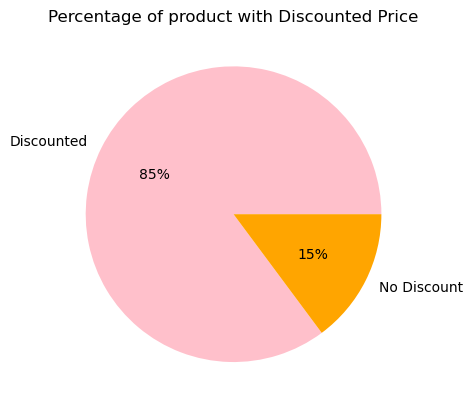

In [7]:
plt.pie(products_df['Discount Status'].value_counts().values, labels=products_df['Discount Status'].unique(),
        autopct='%.0f%%', colors=('pink','orange'))
plt.title('Percentage of product with Discounted Price')
plt.show()

TV is the most discounted price of Category product from the normal prices in total approximately 8000 Ringgit but after discount the total is only 6500 Ringgit, Which this category reach the highest difference price between normal price and discounted price around 1500 Ringgit.

Audio also is the runner up of highest highest difference price between normal price and discounted price around 250 Ringgit, according the total of normal price that is 1500 Ringgit and discounted prices 1250 Ringgit.

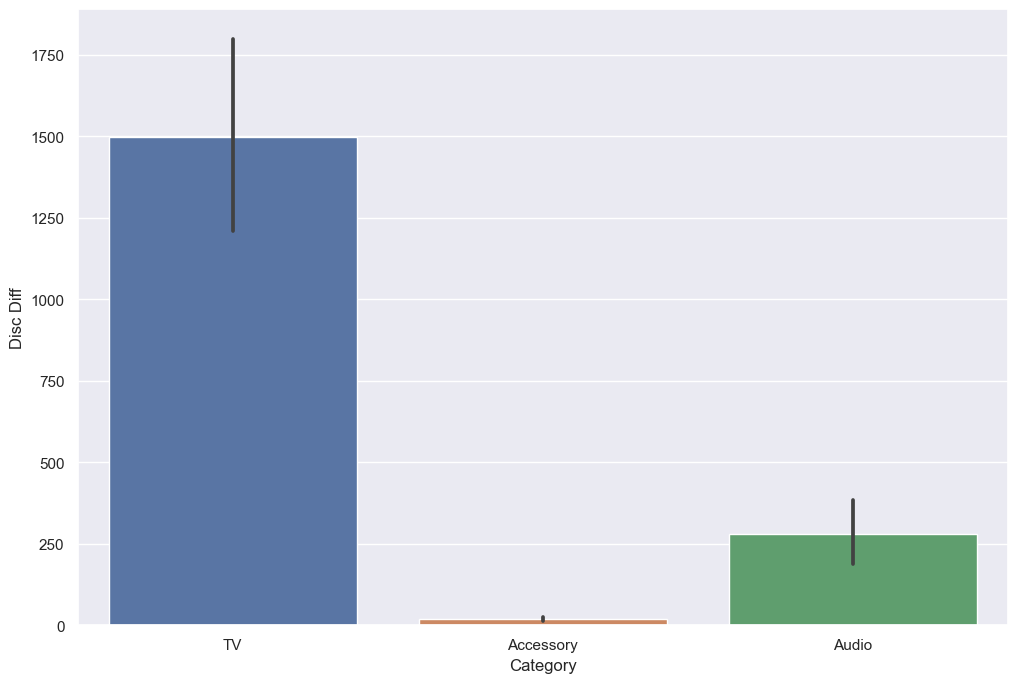

In [8]:
plt.figure(figsize=(12,8))
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(x='Category', y='Disc Diff', data=products_df[products_df['Discount Status'] == 'Discounted'])
plt.show()

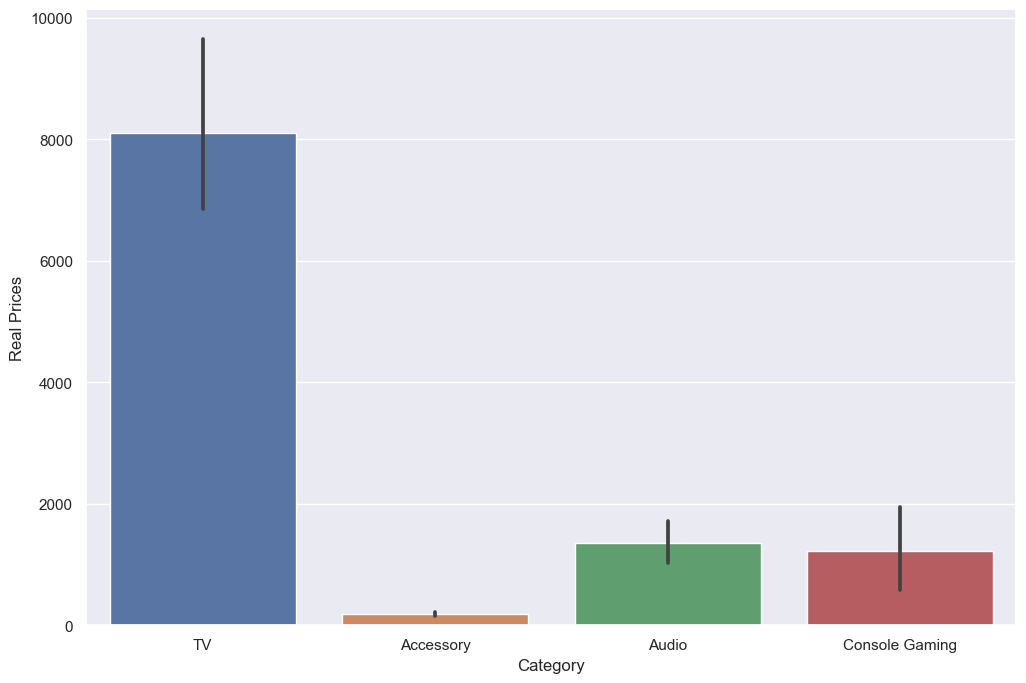

In [9]:
plt.figure(figsize=(12,8))
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(x='Category', y='Real Prices', data=products_df)
plt.show()

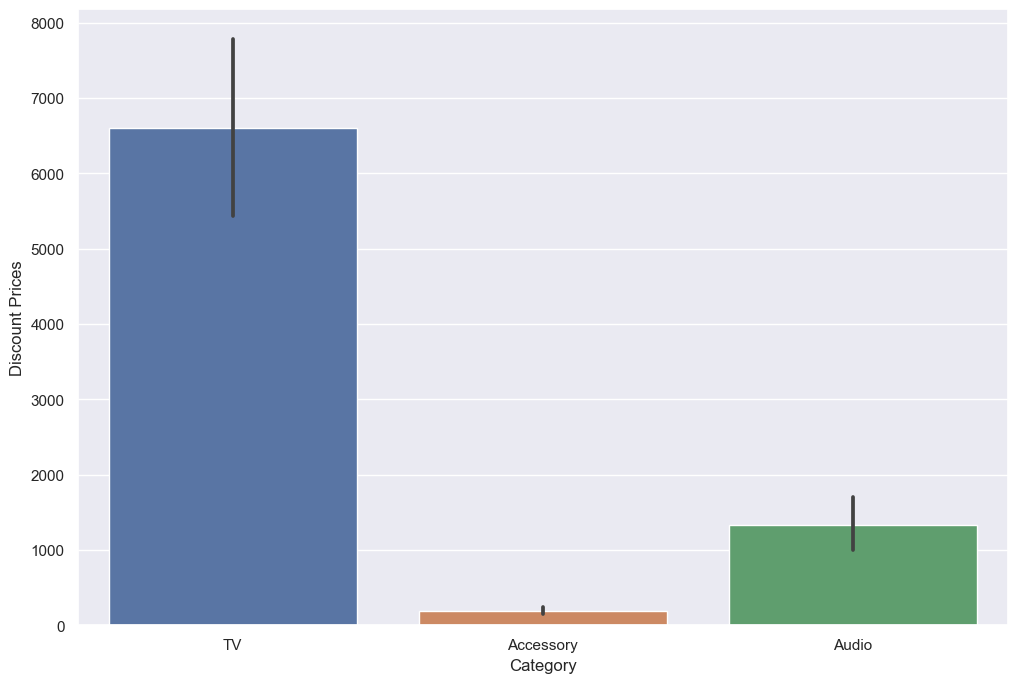

In [10]:
plt.figure(figsize=(12,8))
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(x='Category', y='Discount Prices', data=products_df[products_df['Discount Status'] == 'Discounted'])
plt.show()

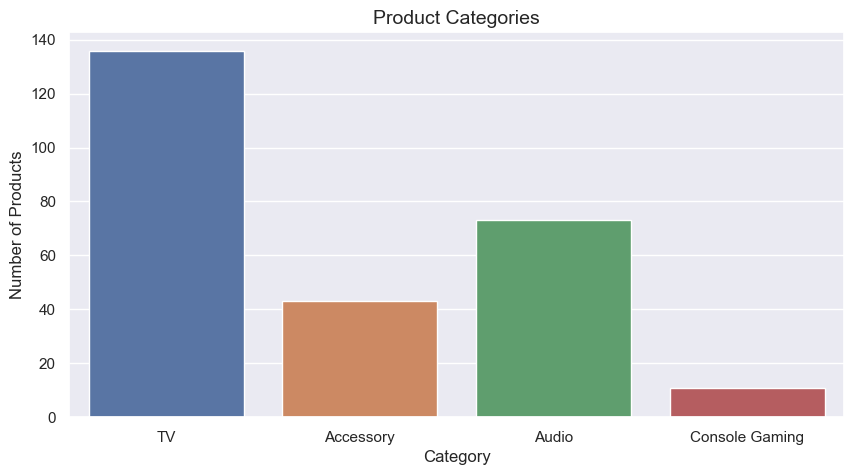

In [11]:
plt.figure(figsize=(10,5))
sns.countplot('Category',data=products_df)
plt.title('Product Categories', size=14)
plt.xlabel('Category', size=12)
plt.ylabel('Number of Products', size=12)
plt.show()

Most of Discounted Product from TV Categories, followed by audio and accessory that can be assume if TV and Audio are during on promo session and the buyer possibly crowded.

While other categories that the only one which have no discount is gaming console, that can be assume if the buyers aren't crowded or less visit than TV or Audio.

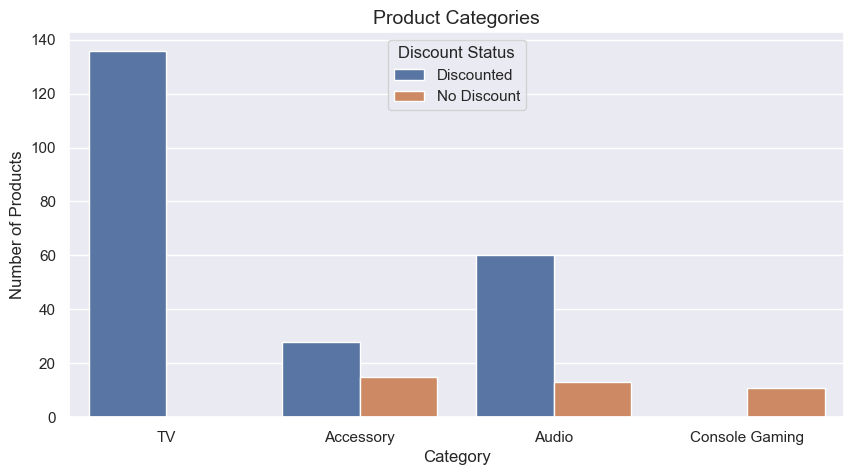

In [12]:
plt.figure(figsize=(10,5))
sns.countplot('Category', hue='Discount Status',data=products_df)
plt.title('Product Categories', size=14)
plt.xlabel('Category', size=12)
plt.ylabel('Number of Products', size=12)
plt.show()

Breakdowned by details from Each Sub Category there are two categories which have the largest discounted number of product which from UHD TVs and Speakers that are come from TV and Audio, followed by OLED TVs, QLED TVs and Earphones - Headphones.

Another subcategories of product which have the largest discounted number of product is TV Brackets that's come from Accessories Category

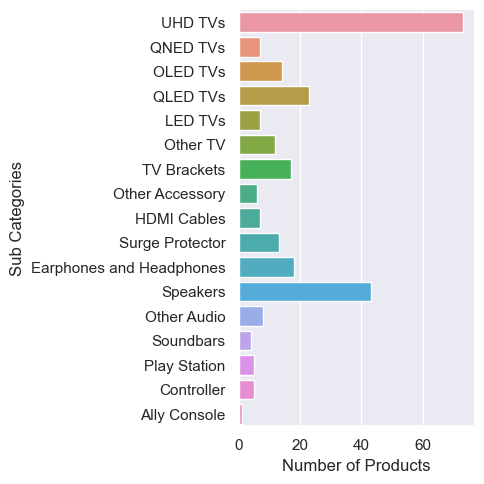

In [13]:
sns.catplot(y='Sub Category', kind='count', data=products_df)
plt.ylabel('Sub Categories', size=12)
plt.xlabel('Number of Products', size=12)
plt.show()

In other side of price after discount, Breakdowned by details from Each Sub Category that the top of 5 sub categories are come from TV such as QNED TVs, OLED TVs, QLED TVs, LED TVs and UHD TVs. 

Another subcategories of product which have big promo is Audio even not big as TV, that consists of Sound Bars and Speaker.

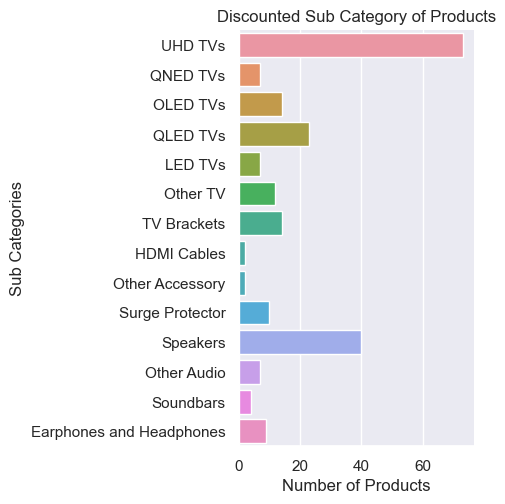

In [21]:
sns.catplot(y='Sub Category', kind='count', data=products_df[products_df['Discount Status']=='Discounted'])
plt.ylabel('Sub Categories', size=12)
plt.xlabel('Number of Products', size=12)
plt.title('Discounted Sub Category of Products')
plt.show()

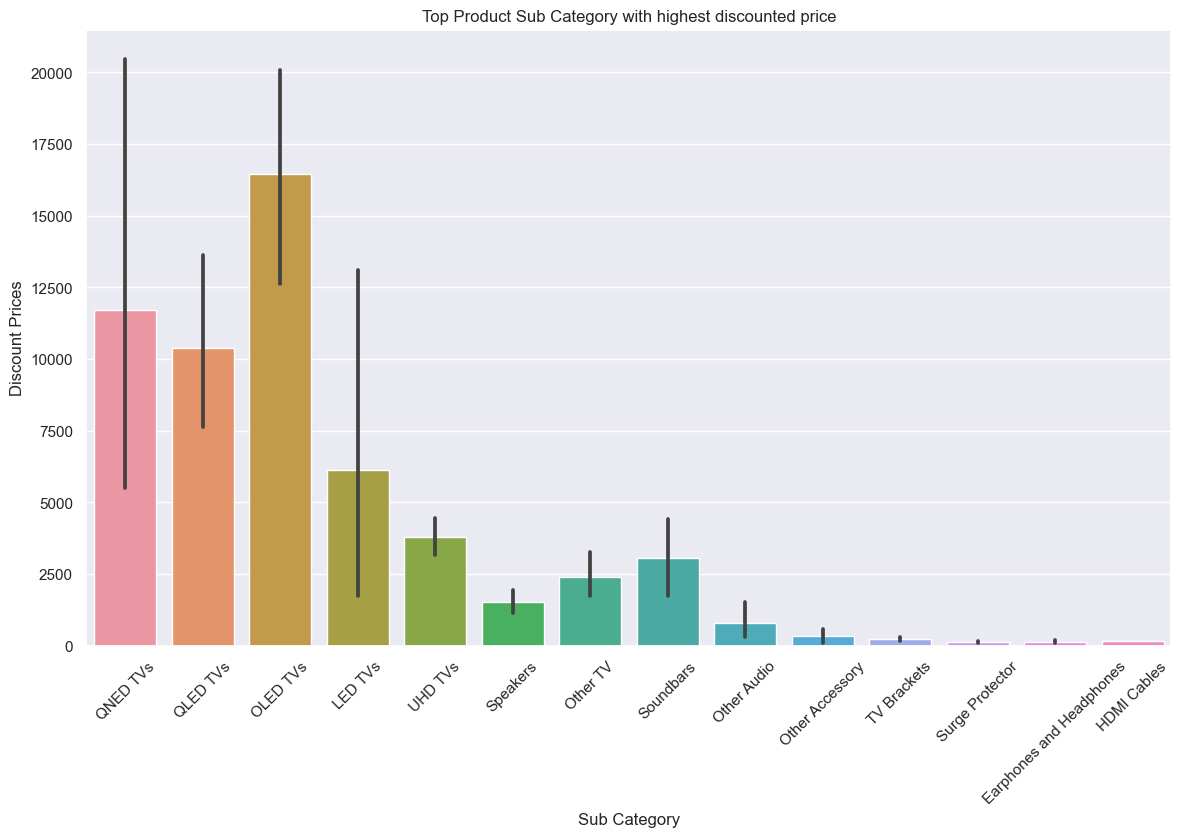

In [75]:
sns.set(rc={'figure.figsize':(14,8)})
sns.barplot(x='Sub Category', y='Discount Prices', data=products_df[products_df['Discount Status'] == 'Discounted']
                .sort_values(by='Discount Prices', ascending=False))
plt.xticks(rotation=45)
plt.title('Top Product Sub Category with highest discounted price')
plt.show()

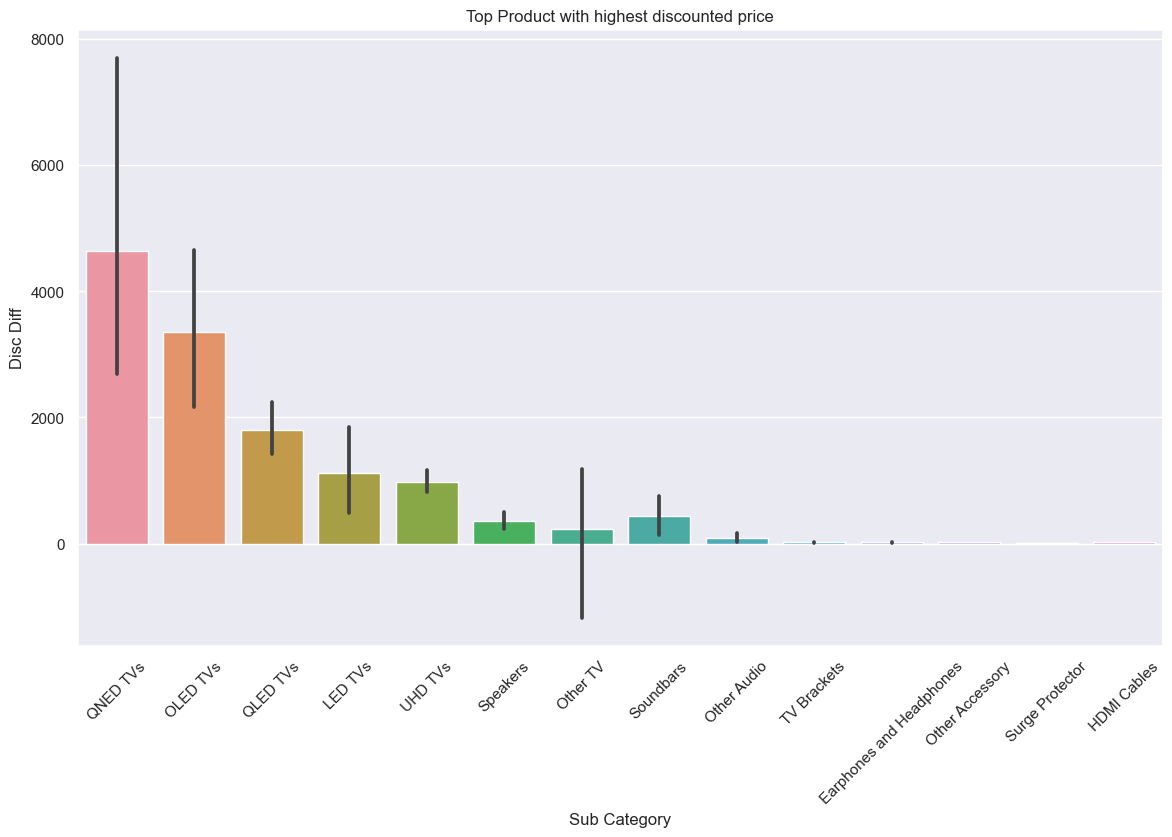

In [14]:
sns.set(rc={'figure.figsize':(14,8)})
sns.barplot(x='Sub Category', y='Disc Diff', data=products_df[products_df['Discount Status'] == 'Discounted']
                .sort_values(by='Disc Diff', ascending=False))
plt.xticks(rotation=45)
plt.title('Top Product with highest discounted price')
plt.show()

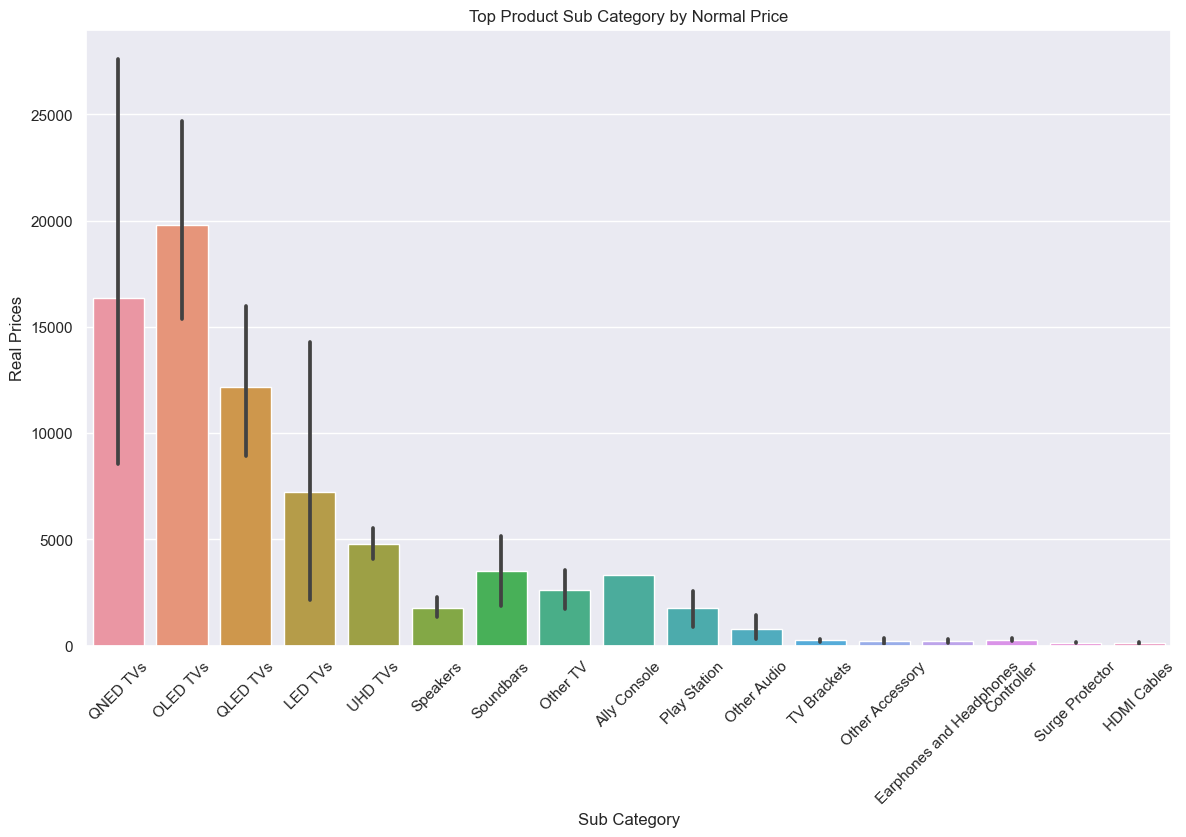

In [15]:
sns.set(rc={'figure.figsize':(14,8)})
sns.barplot(x='Sub Category', y='Real Prices', data=products_df.sort_values(by='Real Prices', ascending=False))
plt.xticks(rotation=45)
plt.title('Top Product Sub Category by Normal Price')
plt.show()

CODE DEBUGGING HISTORY

In [ ]:
# BeautifulSoup(driver.page_source,'html.parser').find('div',{'class':'jss121'}).find('a')

# driver.find_element(By.CSS_SELECTOR, 'div.jss121 a.MuiTypography-root p.MuiTypography-root')

# for i in range(1,len(driver.find_elements(By.XPATH, '//div[@class="jss121"]//a'))+1):
#     driver.execute_script("arguments[0].click();", driver.find_element(By.XPATH, '//div[@class="jss121"]//a'))
#     print(driver.current_url)
#     if i == len(driver.find_elements(By.XPATH, '//div[@class="jss121"]//a')):
#         driver.back()
    
# for i, product in enumerate(driver.find_elements(By.XPATH, '//div[@class="jss121"]//a')):
#     # Klik link produk
#     product.find_element(By.CSS_SELECTOR, '.jss120').send_keys(Keys.ENTER)

#     # Tunggu hingga halaman produk dimuat
#     time.sleep(2)

#     # Dapatkan link produk
#     link = product.find_element(By.CSS_SELECTOR, '.jss121 a').get_attribute("href")

#     # Cetak link produk
#     print(link)

#     # Jika sudah mencapai akhir dari daftar produk, keluar dari loop
#     if i == len(driver.find_elements(By.XPATH, '//div[@class="jss121"]//a')) - 1:
#         break

# driver.current_url
# homen_tv_soup = BeautifulSoup(driver.page_source, 'html.parser')
# # homen_tv_soup
# homen_tv_soup.find()
# senheng_homen = homen_tv_soup.find_all('div',{'class':'jss121'})
# senheng_homen[0].find('div',{'class':'desc-item__price'}).find_next('span',{'class':'jss140'}).find_next('span',{'class':'jss140'})

# browser_options = ChromeOptions()
# browser_options.headless = True

# chrome_url = 'https://www.senheng.com.my/all-products/home-entertainment.html'
# driver = webdriver.Chrome(options=browser_options)
# driver.get(chrome_url)
# driver.maximize_window()

# shop_category = driver.find_element(By.XPATH, 
#               '//*[@id="header"]/main/div/div[2]/div/div[1]/div/div/ul/li[1]/div[1]/a')
# shop_category.click()

# home_entertaiment = driver.find_element(By.XPATH, 
#               '//div[@class="jsx-1691344545"]//div[@class="jsx-627009478"]//a[4]')
# home_entertaiment.click()
# print(driver.page_source)

# homen_tv = driver.find_element(By.XPATH, '//*[@id="scrollable-prevent-tab-1"]/span[1]')
# homen_tv.click()
# homen_tv.execute_script("windows.scrollTo(0, document.body.scrollHeight)")

# scroll product links
# product_links = []

# scroll down untuk memuat data lebih banyak
# while True:
# while len(link_elements) > 0:
#     # kumpulkan semua elemen nama barang yang ada saat ini
#     link_elements = driver.find_elements(By.CSS_SELECTOR, 
#                 'div.jss121 a.jss125')

#     for link_element in link_elements:
#         product_links.append(link_element.text)
#         # ada strike elemen di elemen harga asli
#         # strike_element = link_element.find_element(By.CSS_SELECTOR,'strike')
#         # link_prices.append(strike_element.text)

#     # if not link_elements or link_elements[-1] == new_last_real:
#     #     break  # Jika tidak ada elemen lagi, keluar dari loop

#     driver.execute_script('arguments[0].scrollIntoView();', link_elements[-1])

#     time.sleep(2)

#     new_last_link = driver.find_elements(By.CSS_SELECTOR, 
#                         'div.jss121 div.desc-item__price span.MuiTypography-root:not(strike)')
    
#     # if new_last_real == link_elements[-1]:
#     #     break

# for real in product_links:
#     print(real)

# nama barang 
# wait = WebDriverWait(driver, 10)
# last_product = wait.until(
#     expected_conditions.presence_of_all_elements_located((By.CSS_SELECTOR, 
#                                 'div.jss121 a.MuiTypography-root p.MuiTypography-root')))[-1]
# product_name = driver.find_elements(By.CSS_SELECTOR, 
#                                     'div.jss121 a.MuiTypography-root p.MuiTypography-root')
# product_names = []

# # scroll down untuk memuat data lebih banyak
# while True:
#     # kumpulkan semua elemen nama barang yang ada saat ini
#     product_elements = driver.find_elements(By.CSS_SELECTOR, 
#                                             'div.jss121 a.MuiTypography-root p.MuiTypography-root')

#     for element in product_elements:
#         product_names.append(element)

#     # scroll ke elemen terakhir
#     driver.execute_script("arguments[0].scrollIntoView();", product_elements[-1])
    
#     # tunggu sejenak agar data baru dimuat
#     time.sleep(2)  # Anda dapat menyesuaikan timeout sesuai kebutuhan
    
#     # cari elemen terakhir yang baru dimuat
#     new_last_product = driver.find_elements(By.CSS_SELECTOR,
#                                             'div.jss121 a.MuiTypography-root p.MuiTypography-root')[-1]

#     # Jika elemen terakhir tidak berubah, berarti semua data telah dimuat
#     if new_last_product == product_elements[-1]:
#         break

# for product in product_name:
#     print(product.text)

# harga asli 
# real_prices = []

# # scroll down untuk memuat data lebih banyak
# # while True:
# while len(real_elements) > 0:
#     # kumpulkan semua elemen nama barang yang ada saat ini
#     real_elements = driver.find_elements(By.CSS_SELECTOR, 
#                 'div.jss121 div.desc-item__price span.MuiTypography-root:not(strike)')

#     for real_element in real_elements:
#         real_prices.append(real_element.text)
#         # ada strike elemen di elemen harga asli
#         # strike_element = real_element.find_element(By.CSS_SELECTOR,'strike')
#         # real_prices.append(strike_element.text)

#     # if not real_elements or real_elements[-1] == new_last_real:
#     #     break  # Jika tidak ada elemen lagi, keluar dari loop

#     driver.execute_script('arguments[0].scrollIntoView();', real_elements[-1])

#     time.sleep(2)

#     new_last_real = driver.find_elements(By.CSS_SELECTOR, 
#                         'div.jss121 div.desc-item__price span.MuiTypography-root:not(strike)')
    
#     # if new_last_real == real_elements[-1]:
#     #     break

# for real in real_prices:
#     print(real)

# harga diskon
# current_prices = []
# while True:
#     # kumpulkan semua elemen nama barang yang ada saat ini
#     current_elements = driver.find_elements(By.CSS_SELECTOR, 
#                                 'div.jss121 div.desc-item__price span.MuiTypography-root.js48')

#     for current_element in current_elements:
#         current_prices.append(current_element)

#     if not current_elements:
#         break  # Jika tidak ada elemen lagi, keluar dari loop

#     driver.execute_script('arguments[0].scrollIntoView();',current_elements[-1])

#     time.sleep(2)

#     new_last_current = driver.find_elements(By.CSS_SELECTOR, 
#                                 'div.jss121 div.desc-item__price span.MuiTypography-root.jss39.jss42.jss48')
    

#     if new_last_current == current_elements[-1]:
#         break
# for current in current_prices:
#     print(current.text)

# driver.quit()

In [ ]:
# BeautifulSoup(driver.page_source,'html.parser').find('div',{'class':'jss121'}).find('a')

# driver.find_element(By.CSS_SELECTOR, 'div.jss121 a.MuiTypography-root p.MuiTypography-root')

# for i in range(1,len(driver.find_elements(By.XPATH, '//div[@class="jss121"]//a'))+1):
#     driver.execute_script("arguments[0].click();", driver.find_element(By.XPATH, '//div[@class="jss121"]//a'))
#     print(driver.current_url)
#     if i == len(driver.find_elements(By.XPATH, '//div[@class="jss121"]//a')):
#         driver.back()
    
# for i, product in enumerate(driver.find_elements(By.XPATH, '//div[@class="jss121"]//a')):
#     # Klik link produk
#     product.find_element(By.CSS_SELECTOR, '.jss120').send_keys(Keys.ENTER)

#     # Tunggu hingga halaman produk dimuat
#     time.sleep(2)

#     # Dapatkan link produk
#     link = product.find_element(By.CSS_SELECTOR, '.jss121 a').get_attribute("href")

#     # Cetak link produk
#     print(link)

#     # Jika sudah mencapai akhir dari daftar produk, keluar dari loop
#     if i == len(driver.find_elements(By.XPATH, '//div[@class="jss121"]//a')) - 1:
#         break

# driver.current_url
# homen_tv_soup = BeautifulSoup(driver.page_source, 'html.parser')
# # homen_tv_soup
# homen_tv_soup.find()
# senheng_homen = homen_tv_soup.find_all('div',{'class':'jss121'})
# senheng_homen[0].find('div',{'class':'desc-item__price'}).find_next('span',{'class':'jss140'}).find_next('span',{'class':'jss140'})

# browser_options = ChromeOptions()
# browser_options.headless = True

# chrome_url = 'https://www.senheng.com.my/all-products/home-entertainment.html'
# driver = webdriver.Chrome(options=browser_options)
# driver.get(chrome_url)
# driver.maximize_window()

# shop_category = driver.find_element(By.XPATH, 
#               '//*[@id="header"]/main/div/div[2]/div/div[1]/div/div/ul/li[1]/div[1]/a')
# shop_category.click()

# home_entertaiment = driver.find_element(By.XPATH, 
#               '//div[@class="jsx-1691344545"]//div[@class="jsx-627009478"]//a[4]')
# home_entertaiment.click()
# print(driver.page_source)

# homen_tv = driver.find_element(By.XPATH, '//*[@id="scrollable-prevent-tab-1"]/span[1]')
# homen_tv.click()
# homen_tv.execute_script("windows.scrollTo(0, document.body.scrollHeight)")

# scroll product links
# product_links = []

# scroll down untuk memuat data lebih banyak
# while True:
# while len(link_elements) > 0:
#     # kumpulkan semua elemen nama barang yang ada saat ini
#     link_elements = driver.find_elements(By.CSS_SELECTOR, 
#                 'div.jss121 a.jss125')

#     for link_element in link_elements:
#         product_links.append(link_element.text)
#         # ada strike elemen di elemen harga asli
#         # strike_element = link_element.find_element(By.CSS_SELECTOR,'strike')
#         # link_prices.append(strike_element.text)

#     # if not link_elements or link_elements[-1] == new_last_real:
#     #     break  # Jika tidak ada elemen lagi, keluar dari loop

#     driver.execute_script('arguments[0].scrollIntoView();', link_elements[-1])

#     time.sleep(2)

#     new_last_link = driver.find_elements(By.CSS_SELECTOR, 
#                         'div.jss121 div.desc-item__price span.MuiTypography-root:not(strike)')
    
#     # if new_last_real == link_elements[-1]:
#     #     break

# for real in product_links:
#     print(real)

# nama barang 
# wait = WebDriverWait(driver, 10)
# last_product = wait.until(
#     expected_conditions.presence_of_all_elements_located((By.CSS_SELECTOR, 
#                                 'div.jss121 a.MuiTypography-root p.MuiTypography-root')))[-1]
# product_name = driver.find_elements(By.CSS_SELECTOR, 
#                                     'div.jss121 a.MuiTypography-root p.MuiTypography-root')
# product_names = []

# # scroll down untuk memuat data lebih banyak
# while True:
#     # kumpulkan semua elemen nama barang yang ada saat ini
#     product_elements = driver.find_elements(By.CSS_SELECTOR, 
#                                             'div.jss121 a.MuiTypography-root p.MuiTypography-root')

#     for element in product_elements:
#         product_names.append(element)

#     # scroll ke elemen terakhir
#     driver.execute_script("arguments[0].scrollIntoView();", product_elements[-1])
    
#     # tunggu sejenak agar data baru dimuat
#     time.sleep(2)  # Anda dapat menyesuaikan timeout sesuai kebutuhan
    
#     # cari elemen terakhir yang baru dimuat
#     new_last_product = driver.find_elements(By.CSS_SELECTOR,
#                                             'div.jss121 a.MuiTypography-root p.MuiTypography-root')[-1]

#     # Jika elemen terakhir tidak berubah, berarti semua data telah dimuat
#     if new_last_product == product_elements[-1]:
#         break

# for product in product_name:
#     print(product.text)

# harga asli 
# real_prices = []

# # scroll down untuk memuat data lebih banyak
# # while True:
# while len(real_elements) > 0:
#     # kumpulkan semua elemen nama barang yang ada saat ini
#     real_elements = driver.find_elements(By.CSS_SELECTOR, 
#                 'div.jss121 div.desc-item__price span.MuiTypography-root:not(strike)')

#     for real_element in real_elements:
#         real_prices.append(real_element.text)
#         # ada strike elemen di elemen harga asli
#         # strike_element = real_element.find_element(By.CSS_SELECTOR,'strike')
#         # real_prices.append(strike_element.text)

#     # if not real_elements or real_elements[-1] == new_last_real:
#     #     break  # Jika tidak ada elemen lagi, keluar dari loop

#     driver.execute_script('arguments[0].scrollIntoView();', real_elements[-1])

#     time.sleep(2)

#     new_last_real = driver.find_elements(By.CSS_SELECTOR, 
#                         'div.jss121 div.desc-item__price span.MuiTypography-root:not(strike)')
    
#     # if new_last_real == real_elements[-1]:
#     #     break

# for real in real_prices:
#     print(real)

# harga diskon
# current_prices = []
# while True:
#     # kumpulkan semua elemen nama barang yang ada saat ini
#     current_elements = driver.find_elements(By.CSS_SELECTOR, 
#                                 'div.jss121 div.desc-item__price span.MuiTypography-root.js48')

#     for current_element in current_elements:
#         current_prices.append(current_element)

#     if not current_elements:
#         break  # Jika tidak ada elemen lagi, keluar dari loop

#     driver.execute_script('arguments[0].scrollIntoView();',current_elements[-1])

#     time.sleep(2)

#     new_last_current = driver.find_elements(By.CSS_SELECTOR, 
#                                 'div.jss121 div.desc-item__price span.MuiTypography-root.jss39.jss42.jss48')
    

#     if new_last_current == current_elements[-1]:
#         break
# for current in current_prices:
#     print(current.text)

# driver.quit()

In [ ]:
# ================================================ BEAUTIFUL SOUP AND SELENIUM ====================================================================
# BeautifulSoup(driver.page_source,'html.parser').find('div',{'class':'jss121'}).find('a')

# driver.find_element(By.CSS_SELECTOR, 'div.jss121 a.MuiTypography-root p.MuiTypography-root')

# for i in range(1,len(driver.find_elements(By.XPATH, '//div[@class="jss121"]//a'))+1):
#     driver.execute_script("arguments[0].click();", driver.find_element(By.XPATH, '//div[@class="jss121"]//a'))
#     print(driver.current_url)
#     if i == len(driver.find_elements(By.XPATH, '//div[@class="jss121"]//a')):
#         driver.back()
    
# for i, product in enumerate(driver.find_elements(By.XPATH, '//div[@class="jss121"]//a')):
#     # Klik link produk
#     product.find_element(By.CSS_SELECTOR, '.jss120').send_keys(Keys.ENTER)

#     # Tunggu hingga halaman produk dimuat
#     time.sleep(2)

#     # Dapatkan link produk
#     link = product.find_element(By.CSS_SELECTOR, '.jss121 a').get_attribute("href")

#     # Cetak link produk
#     print(link)

#     # Jika sudah mencapai akhir dari daftar produk, keluar dari loop
#     if i == len(driver.find_elements(By.XPATH, '//div[@class="jss121"]//a')) - 1:
#         break

# driver.current_url
# homen_tv_soup = BeautifulSoup(driver.page_source, 'html.parser')
# # homen_tv_soup
# homen_tv_soup.find()
# senheng_homen = homen_tv_soup.find_all('div',{'class':'jss121'})
# senheng_homen[0].find('div',{'class':'desc-item__price'}).find_next('span',{'class':'jss140'}).find_next('span',{'class':'jss140'})


# senheng_audio[0].find('p',{'class':'jss122'}).get_text()
# senheng_audio[0].find('div',{'class':'desc-item__price'}).find('span',{'class':'jss140'}).find('strike')

# list(zip(product_names, real_prices, current_prices))

# for senaud in senheng_audio:
#     # Cek apakah elemen span ada
#     if senaud.find('div', {'class': 'desc-item__price'}).find('span', {'class': 'jss140'}) is not None:
#         # Elemen span ada
#         if senaud.find('div', {'class': 'desc-item__price'}).find('span', {'class': 'jss140'}).find('strike') is not None:
#             # Elemen strike ada
#             print('real price :',senaud.find('div', {'class': 'desc-item__price'}).find('span', {'class': 'jss140'}).find('strike').get_text())
#             print('current price :',senaud.find('div', {'class': 'desc-item__price'}).find_next('span', {'class': 'jss140'}).get_text())
#         else:
#             # Elemen strike tidak ada
#             print('real price :',senaud.find('div', {'class': 'desc-item__price'}).find('span', {'class': 'jss140'}).get_text())
#             print('current price :',str(0))
#     else:
#         # Elemen span tidak ada
#         print('real price :',str(0))
#         print('current price :',str(0))

# for senaud in senheng_audio:
#     print('This is Real Price')
#     real_price_elem = senaud.find('div', {'class': 'desc-item__price'}).find('span', {'class': 'jss140'}).find('strike')
#     if real_price_elem is not None:
#         print(real_price_elem.get_text())
#     else:
#         print('None')

#     print('This is Current Price')
#     current_price_elem = senaud.find('div', {'class': 'desc-item__price'}).find_next('span', {'class': 'jss141'}).find_next('span', {'class': 'jss140'})
#     if current_price_elem is not None:
#         print(current_price_elem.get_text())
#     else:
#         print('None')
    # if senaud.find('div',{'class':'desc-item__price'}).find('span',{'class':'jss140'}).find('strike') is None :
    #     print(senaud.find('div',{'class':'desc-item__price'}).find('span',{'class':'jss140'}))
    # else:
    #     print(senaud.find('div',{'class':'desc-item__price'}).find('span',{'class':'jss140'}).find('strike'))

        # senaud.find('div',{'class':'desc-item__price'}).find_next('span',{'class':'jss141'}).find_next('span',{'class':'jss140'})
    # if senaud.find('div',{'class':'desc-item__price'}).find_next('span',{'class':'jss141'}).find_next('span',{'class':'jss140'}) is None:
    #     print(0)
    # else:
    #     print(senaud.find('div',{'class':'desc-item__price'}).find_next('span',{'class':'jss141'}).find_next('span',{'class':'jss140'}))
# senheng_audio[0].find('div',{'class':'desc-item__price'}).find_next('span',{'class':'jss141'}).find_next('span',{'class':'jss140'}).get_text()

# senheng_access = access_soup.find_all('div',{'class':'jss121'})
# # senheng_access[0].find('p',{'class':'jss122'}).get_text()
# senheng_access[0].find('div',{'class':'desc-item__price'}).find('span', {'class': 'jss140'}).find('strike')
# senheng_access[0].find('div',{'class':'desc-item__price'}).find_next('span', {'class': 'jss140'}).find_next('span', {'class': 'jss140'})

# for senaccess in senheng_access:
#     if senaccess.find('div', {'class': 'desc-item__price'}).find('span', {'class': 'jss140'}) is not None:
#         # Elemen span ada
#         if senaccess.find('div', {'class': 'desc-item__price'}).find('span', {'class': 'jss140'}).find('strike') is not None:
#             # Elemen strike ada
#             print('Real Prices :', senaccess.find('div', {'class': 'desc-item__price'}).find('span', {'class': 'jss140'}).find('strike').get_text())
#             print('Current Prices :',senaccess.find('div', {'class': 'desc-item__price'}).find_next('span', {'class': 'jss140'}).find_next('span', {'class': 'jss140'}).get_text())
#             print('===================================================================')
#         else:
#             # Elemen strike tidak ada
#             print('Real Prices :',senaccess.find('div', {'class': 'desc-item__price'}).find('span', {'class': 'jss140'}).get_text())
#             print('Current Prices :',str(0))
#             print('===================================================================')
#     else:
#         # Elemen span tidak ada
#         print('Real Prices :', str(0))
#         print('Current Prices :',str(0))
#         print('===================================================================')

# ============================================================= SELENIUM ONLY ====================================================================
# browser_options = ChromeOptions()
# browser_options.headless = True

# chrome_url = 'https://www.senheng.com.my/all-products/home-entertainment.html'
# driver = webdriver.Chrome(options=browser_options)
# driver.get(chrome_url)
# driver.maximize_window()

# shop_category = driver.find_element(By.XPATH, 
#               '//*[@id="header"]/main/div/div[2]/div/div[1]/div/div/ul/li[1]/div[1]/a')
# shop_category.click()

# home_entertaiment = driver.find_element(By.XPATH, 
#               '//div[@class="jsx-1691344545"]//div[@class="jsx-627009478"]//a[4]')
# home_entertaiment.click()
# print(driver.page_source)

# homen_tv = driver.find_element(By.XPATH, '//*[@id="scrollable-prevent-tab-1"]/span[1]')
# homen_tv.click()
# homen_tv.execute_script("windows.scrollTo(0, document.body.scrollHeight)")

# scroll product links
# product_links = []

# scroll down untuk memuat data lebih banyak
# while True:
# while len(link_elements) > 0:
#     # kumpulkan semua elemen nama barang yang ada saat ini
#     link_elements = driver.find_elements(By.CSS_SELECTOR, 
#                 'div.jss121 a.jss125')

#     for link_element in link_elements:
#         product_links.append(link_element.text)
#         # ada strike elemen di elemen harga asli
#         # strike_element = link_element.find_element(By.CSS_SELECTOR,'strike')
#         # link_prices.append(strike_element.text)

#     # if not link_elements or link_elements[-1] == new_last_real:
#     #     break  # Jika tidak ada elemen lagi, keluar dari loop

#     driver.execute_script('arguments[0].scrollIntoView();', link_elements[-1])

#     time.sleep(2)

#     new_last_link = driver.find_elements(By.CSS_SELECTOR, 
#                         'div.jss121 div.desc-item__price span.MuiTypography-root:not(strike)')
    
#     # if new_last_real == link_elements[-1]:
#     #     break

# for real in product_links:
#     print(real)

# nama barang 
# wait = WebDriverWait(driver, 10)
# last_product = wait.until(
#     expected_conditions.presence_of_all_elements_located((By.CSS_SELECTOR, 
#                                 'div.jss121 a.MuiTypography-root p.MuiTypography-root')))[-1]
# product_name = driver.find_elements(By.CSS_SELECTOR, 
#                                     'div.jss121 a.MuiTypography-root p.MuiTypography-root')
# product_names = []

# # scroll down untuk memuat data lebih banyak
# while True:
#     # kumpulkan semua elemen nama barang yang ada saat ini
#     product_elements = driver.find_elements(By.CSS_SELECTOR, 
#                                             'div.jss121 a.MuiTypography-root p.MuiTypography-root')

#     for element in product_elements:
#         product_names.append(element)

#     # scroll ke elemen terakhir
#     driver.execute_script("arguments[0].scrollIntoView();", product_elements[-1])
    
#     # tunggu sejenak agar data baru dimuat
#     time.sleep(2)  # Anda dapat menyesuaikan timeout sesuai kebutuhan
    
#     # cari elemen terakhir yang baru dimuat
#     new_last_product = driver.find_elements(By.CSS_SELECTOR,
#                                             'div.jss121 a.MuiTypography-root p.MuiTypography-root')[-1]

#     # Jika elemen terakhir tidak berubah, berarti semua data telah dimuat
#     if new_last_product == product_elements[-1]:
#         break

# for product in product_name:
#     print(product.text)

# harga asli 
# real_prices = []

# # scroll down untuk memuat data lebih banyak
# # while True:
# while len(real_elements) > 0:
#     # kumpulkan semua elemen nama barang yang ada saat ini
#     real_elements = driver.find_elements(By.CSS_SELECTOR, 
#                 'div.jss121 div.desc-item__price span.MuiTypography-root:not(strike)')

#     for real_element in real_elements:
#         real_prices.append(real_element.text)
#         # ada strike elemen di elemen harga asli
#         # strike_element = real_element.find_element(By.CSS_SELECTOR,'strike')
#         # real_prices.append(strike_element.text)

#     # if not real_elements or real_elements[-1] == new_last_real:
#     #     break  # Jika tidak ada elemen lagi, keluar dari loop

#     driver.execute_script('arguments[0].scrollIntoView();', real_elements[-1])

#     time.sleep(2)

#     new_last_real = driver.find_elements(By.CSS_SELECTOR, 
#                         'div.jss121 div.desc-item__price span.MuiTypography-root:not(strike)')
    
#     # if new_last_real == real_elements[-1]:
#     #     break

# for real in real_prices:
#     print(real)

# harga diskon
# current_prices = []
# while True:
#     # kumpulkan semua elemen nama barang yang ada saat ini
#     current_elements = driver.find_elements(By.CSS_SELECTOR, 
#                                 'div.jss121 div.desc-item__price span.MuiTypography-root.js48')

#     for current_element in current_elements:
#         current_prices.append(current_element)

#     if not current_elements:
#         break  # Jika tidak ada elemen lagi, keluar dari loop

#     driver.execute_script('arguments[0].scrollIntoView();',current_elements[-1])

#     time.sleep(2)

#     new_last_current = driver.find_elements(By.CSS_SELECTOR, 
#                                 'div.jss121 div.desc-item__price span.MuiTypography-root.jss39.jss42.jss48')
    

#     if new_last_current == current_elements[-1]:
#         break
# for current in current_prices:
#     print(current.text)

# driver.quit()